<a href="https://colab.research.google.com/github/AshishGusain17/ML_Projs/blob/master/JanateHack_ML_in_agriculture/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# 88858 rows × 10 columns

In [ ]:
dataframe = pd.read_csv("/content/train.csv" ) 
array = dataframe.values 

X = dataframe.Estimated_Insects_Count.values.reshape((-1,1))
X = np.array([1,2,3,4,5,6,7,8]).reshape((-1,1))

print(X[:10])
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X[:10]) 


np.set_printoptions(precision=3) 
print(rescaledX[:10]) 


[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[0.   ]
 [0.143]
 [0.286]
 [0.429]
 [0.571]
 [0.714]
 [0.857]
 [1.   ]]


In [ ]:
df = pd.read_csv("/content/train.csv")
df.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
df.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)
df.dropna(subset=["Season"], axis=0, inplace=True)

arr = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit']
X = df.loc[:, arr].values
Y = df.loc[: , "Crop_Damage"].values
X.shape , Y.shape

((79858, 7), (79858,))

In [ ]:
df.columns.values

array(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'], dtype=object)

In [ ]:
import scipy
arr = df.columns.values
arr = arr.tolist()
arr.remove('ID')

for i in arr:
    a,b = scipy.stats.pearsonr(df["Crop_Damage"],df[i])
    print(i,a,b)

# corelation-coefficient        p-value       
# corelation coefficient close to 1 or -1 and p-value < 0.001 is considered strong corelation


Estimated_Insects_Count 0.20379572434428975 0.0
Crop_Type -0.01709710916643973 1.353200772452846e-06
Soil_Type -0.024569104068500176 3.812549517857125e-12
Pesticide_Use_Category 0.1765520668378686 0.0
Number_Doses_Week -0.03096670779075563 2.0795220014947948e-18
Number_Weeks_Used 0.2321920383032649 0.0
Number_Weeks_Quit -0.13311604791752846 1.99275288465e-312
Season 0.0006338132894572154 0.8578532835741154
Crop_Damage 1.0 0.0


(79858, 10)


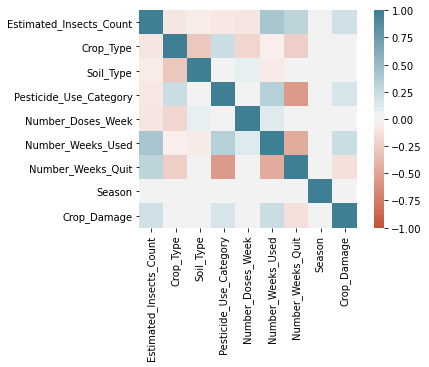

In [ ]:
import seaborn as sns
print(df.shape)
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
from sklearn.model_selection import KFold
scores = []
model = ensemble.RandomForestClassifier( criterion= 'entropy' , max_depth=11 , n_estimators= 300)
cv = KFold(n_splits=5, random_state=42, shuffle=True)


for train_index, test_index in cv.split(X):

    trainX , trainY = X[train_index] , Y[train_index]
    testX , testY   = X[test_index]  , Y[test_index]

    model.fit(trainX , trainY)
    scr = model.score(testX , testY)
    scores.append(scr)
scores




submit = pd.read_csv("/content/test.csv")

submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 0)
submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 0)

arr = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit']
features = submit.loc[:, arr].values
col1 = submit.loc[: , "ID"].values



# for ind in range(len(ids)):
#     col1.append(ids[ind])
#     ans = model.predict(X[ind].reshape(1,8))[0]
#     col2.append(ans)

col2 = model.predict(features)

dict = {'ID': col1, 'Crop_Damage': col2} 
df_fin = pd.DataFrame(dict) 
df_fin.to_csv('rtg.csv', index=False) 


In [ ]:
df = pd.read_csv("/content/train.csv")
print(df['Number_Weeks_Used'].isnull().values.any())
df['Number_Weeks_Used'] = df['Number_Weeks_Used'].replace(np.nan, 0)
print(df['Number_Weeks_Used'].isnull().values.any())


True
False


In [ ]:
def prepare_random_forest_random_search():
    df = pd.read_csv("/content/train.csv")
    # df.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
    # df.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)
    # df.dropna(subset=["Season"], axis=0, inplace=True)

    df['Number_Weeks_Used'] = df['Number_Weeks_Used'].replace(np.nan, 0)
    df['Number_Weeks_Quit'] = df['Number_Weeks_Quit'].replace(np.nan, 0)



    Y = df.loc[: , "Crop_Damage"].values

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']
    X = df.loc[:, arr]
    print(X.shape , Y.shape)

    num_labels = df["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , Y.shape)


    num_labels = df["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , Y.shape)


    num_labels = df["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , Y.shape)
    return X , Y

def random_forest_random_search(X , Y):
    classifier = ensemble.RandomForestClassifier(n_jobs = -1)
    param_grid = {
        "n_estimators" : np.arange(100,2000,100),
        "max_depth" : np.arange(1,25),
        "criterion" : ["gini" , "entropy"]
    }

    model = RandomizedSearchCV(estimator = classifier,
                        param_distributions = param_grid,
                        cv = 5,
                        n_iter = 10,
                        verbose = 10)
    model.fit(X,Y)

    return model


def pred_random_forest_random_search(model):
    submit = pd.read_csv("/content/test.csv")
    submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 0)
    submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 0)


    col1 = submit.loc[: , "ID"].values

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']
    X = submit.loc[:, arr]


    num_labels = submit["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , col1.shape)

    col2 = model.predict(X)

    dict = {'ID': col1, 'Crop_Damage': col2} 
    df_fin = pd.DataFrame(dict) 
    df_fin.to_csv('pred_random_forest_random_search.csv', index=False) 


In [ ]:
X , Y = prepare_random_forest_random_search()
model = random_forest_random_search(X , Y)

(79858, 4) (79858,)
unique =  2
(79858, 6) (79858,)
unique =  2
(79858, 8) (79858,)
unique =  3
(79858, 11) (79858,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=1900, max_depth=14, criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1900, max_depth=14, criterion=gini, score=0.846, total=  35.7s
[CV] n_estimators=1900, max_depth=14, criterion=gini .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


[CV]  n_estimators=1900, max_depth=14, criterion=gini, score=0.844, total=  33.7s
[CV] n_estimators=1900, max_depth=14, criterion=gini .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=1900, max_depth=14, criterion=gini, score=0.845, total=  37.9s
[CV] n_estimators=1900, max_depth=14, criterion=gini .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=1900, max_depth=14, criterion=gini, score=0.841, total=  33.2s
[CV] n_estimators=1900, max_depth=14, criterion=gini .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  n_estimators=1900, max_depth=14, criterion=gini, score=0.843, total=  33.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


0.8435973389534622
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1900, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8662125272358436


In [ ]:
print(model.best_score_)
print(model.best_estimator_.get_params())
print(model.score(X,Y))
pred_random_forest_random_search(model)

0.8435973389534622
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1900, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8662125272358436
unique =  2
(59310, 6) (59310,)
unique =  2
(59310, 8) (59310,)
unique =  3
(59310, 11) (59310,)


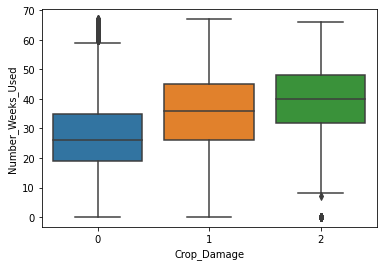

In [13]:
import seaborn as sns
sns.boxplot(y="Number_Weeks_Used",x="Crop_Damage",data=df)

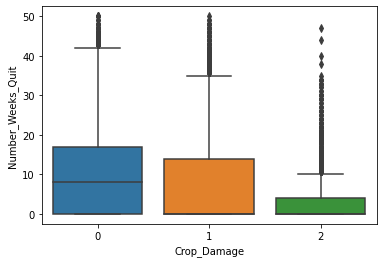

In [14]:
sns.boxplot(y="Number_Weeks_Quit",x="Crop_Damage",data=df)

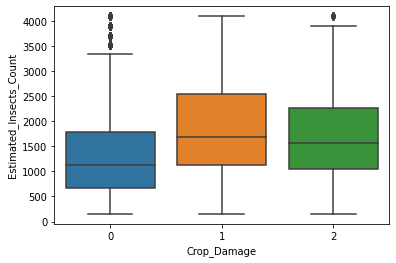

In [16]:
sns.boxplot(y="Estimated_Insects_Count",x="Crop_Damage",data=df)

In [1]:
def prepare_xgboost_random_search():
    df = pd.read_csv("/content/train.csv")
    df = df.sample(frac=1)
    # df.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
    # df.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)
    # df.dropna(subset=["Season"], axis=0, inplace=True)


    df['Number_Weeks_Used'] = df['Number_Weeks_Used'].replace(np.nan, df['Number_Weeks_Used'].median())
    df['Number_Weeks_Quit'] = df['Number_Weeks_Quit'].replace(np.nan, df['Number_Weeks_Quit'].median())


    # all0 = df[df["Crop_Damage"]==0]
    # all1 = df[df["Crop_Damage"]==1]
    # all2 = df[df["Crop_Damage"]==2]
    # all0  = all0.sample(frac=1)
    # all1  = all1.sample(frac=1)
    # all2  = all2.sample(frac=1)
    # df = pd.concat([all0,all1,all2])
    # df = df.sample(frac=1)




    Y = df.loc[: , "Crop_Damage"].values

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']


    X = df.loc[:, arr]
    print(X.shape , Y.shape)

    num_labels = df["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]

    print(X.shape , Y.shape)




    # arr_to_stan = np.array(X["Estimated_Insects_Count"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Estimated_Insects_Count"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(X["Number_Doses_Week"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Doses_Week"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(X["Number_Weeks_Used"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Weeks_Used"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(X["Number_Weeks_Quit"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Weeks_Quit"] = scaler.fit_transform(arr_to_stan)

    np.set_printoptions(precision=3)

    return X , Y

def xgboost_random_search(X , Y):
    classifier = XGBClassifier(n_jobs = -1)
    param_grid = {
        "n_estimators" : np.arange(100,1200,100),
        "max_depth" : np.arange(1,10)
    }

    model = RandomizedSearchCV(estimator = classifier,
                        param_distributions = param_grid,
                        cv = 5,
                        n_iter = 10,
                        verbose=1000
                        )
    model.fit(X,Y)


    # model = XGBClassifier(n_jobs = -1, n_estimators = 300, max_depth = 10, verbosity=3)
    # model.fit(X,Y)
    # print(model.score(X,Y))

    return model



def pred_xgboost_random_search(model):
    submit = pd.read_csv("/content/test.csv")
    submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 28)
    submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 7)

    col1 = submit.loc[: , "ID"].values
    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']



    X = submit.loc[:, arr]


    num_labels = submit["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , col1.shape)





    # arr_to_stan = np.array(submit["Estimated_Insects_Count"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Estimated_Insects_Count"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(submit["Number_Doses_Week"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Doses_Week"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(submit["Number_Weeks_Used"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Weeks_Used"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(submit["Number_Weeks_Quit"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Weeks_Quit"] = scaler.fit_transform(arr_to_stan) 

    np.set_printoptions(precision=3)

    col2 = model.predict(X)

    dict = {'ID': col1, 'Crop_Damage': col2} 
    df_fin = pd.DataFrame(dict) 
    df_fin.to_csv('pred_xg_replace.csv', index=False) 


In [ ]:
X , Y = prepare_xgboost_random_search()
model = xgboost_random_search(X , Y)
X[:]

In [76]:
print(model.best_score_)
print(model.best_estimator_.get_params())
print(model.score(X,Y))
pred_xgboost_random_search(model)

0.8354678249441816
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'missing': None, 'n_estimators': 1100, 'n_jobs': -1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
0.8354678250692116
(59310, 1) (59310,)


In [ ]:
def prepare_naive_random_search():
    df = pd.read_csv("/content/train.csv")
    df.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
    df.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)
    # df.dropna(subset=["Season"], axis=0, inplace=True)

    # all0 = df[df["Crop_Damage"]==0]
    # all1 = df[df["Crop_Damage"]==1]
    # all2 = df[df["Crop_Damage"]==2]
    # all0  = all0.sample(frac=1)[:20000]
    # all1  = all1.sample(frac=1)
    # all2  = all2.sample(frac=1)
    # df = pd.concat([all0,all1,all2])
    # df = df.sample(frac=1)




    Y = df.loc[: , "Crop_Damage"].values

    arr = ['Estimated_Insects_Count'  , 'Number_Weeks_Used' , 'Number_Weeks_Quit' ]
    X = df.loc[:, arr]
    print(X.shape , Y.shape)

    # num_labels = df["Crop_Type"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(df["Crop_Type"])
    # X["Crop_Type1"] = newdf[0]
    # X["Crop_Type2"] = newdf[1]
    # print(X.shape , Y.shape)

    # num_labels = df["Soil_Type"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(df["Soil_Type"])
    # X["Soil_Type1"] = newdf[0]
    # X["Soil_Type2"] = newdf[1]
    # print(X.shape , Y.shape)

    num_labels = df["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , Y.shape)

    # num_labels = df["Season"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(df["Season"])
    # X["Season1"] = newdf[1]
    # X["Season2"] = newdf[2]
    # X["Season3"] = newdf[3]
    # print(X.shape , Y.shape)


    arr_to_stan = np.array(X["Estimated_Insects_Count"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Estimated_Insects_Count"] = scaler.fit_transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Doses_Week"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Number_Doses_Week"] = scaler.fit_transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Weeks_Used"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Number_Weeks_Used"] = scaler.fit_transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Weeks_Quit"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Number_Weeks_Quit"] = scaler.fit_transform(arr_to_stan)


    np.set_printoptions(precision=3)

    return X , Y

def naive_random_search(X , Y):
    classifier = MultinomialNB()
    classifier.partial_fit(X, Y, classes=[0, 1, 2])
    param_grid = {
        "alpha" : [0.1 , 0.2 , 0.3 , 0.4 ,  0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1],
        "fit_prior" : [True, False]
    }

    model = RandomizedSearchCV(estimator = classifier,
                        param_distributions = param_grid,
                        cv = 5,
                        n_iter = 200,
                        verbose=10
                        )
    model.fit(X,Y)
    return model



def pred_naive_random_search(model):
    submit = pd.read_csv("/content/test.csv")
    submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 0)
    submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 0)
    # submit['Season'] = submit['Season'].replace(np.nan, 0)

    col1 = submit.loc[: , "ID"].values
    arr = ['Estimated_Insects_Count'  , 'Number_Weeks_Used' , 'Number_Weeks_Quit' ]
    X = submit.loc[:, arr]


    # num_labels = submit["Crop_Type"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(submit["Crop_Type"])
    # X["Crop_Type1"] = newdf[0]
    # X["Crop_Type2"] = newdf[1]
    # print(X.shape , col1.shape)

    # num_labels = submit["Soil_Type"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(submit["Soil_Type"])
    # X["Soil_Type1"] = newdf[0]
    # X["Soil_Type2"] = newdf[1]
    # print(X.shape , col1.shape)

    num_labels = submit["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , col1.shape)

    # num_labels = df["Season"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(df["Season"])
    # X["Season1"] = newdf[1]
    # X["Season2"] = newdf[2]
    # X["Season3"] = newdf[3]
    # X['Season1'] = X['Season1'].replace(np.nan, 0)
    # X['Season2'] = X['Season2'].replace(np.nan, 0)
    # X['Season3'] = X['Season3'].replace(np.nan, 0)
    # print(X.shape , Y.shape)



    arr_to_stan = np.array(submit["Estimated_Insects_Count"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Estimated_Insects_Count"] = scaler.fit_transform(arr_to_stan) 

    # arr_to_stan = np.array(submit["Number_Doses_Week"]).reshape((-1,1))
    # scaler = MinMaxScaler(feature_range=(0, 1)) 
    # X["Number_Doses_Week"] = scaler.fit_transform(arr_to_stan) 

    arr_to_stan = np.array(submit["Number_Weeks_Used"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Number_Weeks_Used"] = scaler.fit_transform(arr_to_stan) 

    arr_to_stan = np.array(submit["Number_Weeks_Quit"]).reshape((-1,1))
    scaler = MinMaxScaler(feature_range=(0, 1)) 
    X["Number_Weeks_Quit"] = scaler.fit_transform(arr_to_stan) 

    np.set_printoptions(precision=3)

    col2 = model.predict(X)

    dict = {'ID': col1, 'Crop_Damage': col2} 
    df_fin = pd.DataFrame(dict) 
    df_fin.to_csv('pred_naive_feat.csv', index=False) 


In [ ]:
X , Y = prepare_naive_random_search()
# model = naive_random_search(X , Y)
X[:]

In [ ]:
print(model.best_score_)
print(model.best_estimator_.get_params())
print(model.score(X,Y))
pred_naive_random_search(model)



In [ ]:
def prepare_svm_random_search():
    df = pd.read_csv("/content/train.csv")
    df.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
    df.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)
    # df.dropna(subset=["Season"], axis=0, inplace=True)

    # all0 = df[df["Crop_Damage"]==0]
    # all1 = df[df["Crop_Damage"]==1]
    # all2 = df[df["Crop_Damage"]==2]
    # all0  = all0.sample(frac=1)[:20000]
    # all1  = all1.sample(frac=1)
    # all2  = all2.sample(frac=1)
    # df = pd.concat([all0,all1,all2])
    # df = df.sample(frac=1)




    Y = df.loc[: , "Crop_Damage"].values

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']
    X = df.loc[:, arr]
    print(X.shape , Y.shape)

    num_labels = df["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , Y.shape)



    arr_to_stan = np.array(X["Estimated_Insects_Count"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Estimated_Insects_Count"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Doses_Week"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Doses_Week"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Weeks_Used"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Weeks_Used"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(X["Number_Weeks_Quit"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Weeks_Quit"] = scaler.transform(arr_to_stan) 

    np.set_printoptions(precision=3)

    return X , Y

def svm_random_search(X , Y):
    classifier = svm.SVC()

    param_grid = {
        "C" :  [0.1 , 0.2 , 0.3 , 0.4 ,  0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1],
        "kernel" : ["linear", "poly", "rbf", "sigmoid", "precomputed"],
        "degree" : [3 ,4, 2]
    }

    model = RandomizedSearchCV(estimator = classifier,
                        param_distributions = param_grid,
                        cv = 5,
                        n_iter = 10,
                        verbose=10
                        )
    model.fit(X,Y)


    # model = XGBClassifier(n_jobs = -1, n_estimators = 300, max_depth = 10, verbosity=3)
    # model.fit(X,Y)
    # print(model.score(X,Y))

    return model



def pred_svm_random_search(model):
    submit = pd.read_csv("/content/test.csv")
    submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 0)
    submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 0)

    col1 = submit.loc[: , "ID"].values
    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']
    X = submit.loc[:, arr]


    num_labels = submit["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , col1.shape)




    arr_to_stan = np.array(submit["Estimated_Insects_Count"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Estimated_Insects_Count"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(submit["Number_Doses_Week"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Doses_Week"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(submit["Number_Weeks_Used"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Weeks_Used"] = scaler.transform(arr_to_stan) 

    arr_to_stan = np.array(submit["Number_Weeks_Quit"]).reshape((-1,1))
    scaler = StandardScaler().fit(arr_to_stan) 
    X["Number_Weeks_Quit"] = scaler.transform(arr_to_stan)

    np.set_printoptions(precision=3)

    col2 = model.predict(X)

    dict = {'ID': col1, 'Crop_Damage': col2} 
    df_fin = pd.DataFrame(dict) 
    df_fin.to_csv('pred_svm_.csv', index=False) 


In [ ]:

X , Y = prepare_svm_random_search()
model = svm_random_search(X , Y)
# X[:]

In [ ]:
print(model.best_score_)
print(model.best_estimator_.get_params())
print(model.score(X,Y))
pred_svm_random_search(model)

In [54]:
def get_without_na(model):
    submit = pd.read_csv("/content/test.csv")
    submit.dropna(subset=["Number_Weeks_Used"], axis=0, inplace=True)
    submit.dropna(subset=["Number_Weeks_Quit"], axis=0, inplace=True)


    # submit['Number_Weeks_Used'] = submit['Number_Weeks_Used'].replace(np.nan, 28)
    # submit['Number_Weeks_Quit'] = submit['Number_Weeks_Quit'].replace(np.nan, 7)


    col1 = submit.loc[: , "ID"].values
    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week' , 'Number_Weeks_Used' , 'Number_Weeks_Quit']
    X = submit.loc[:, arr]


    num_labels = submit["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    num_labels = submit["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(submit["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , col1.shape)

    # num_labels = submit["Pesticide_Use_Category"].nunique()
    # print("unique = ",num_labels)
    # newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    # X["Pesticide_Use_Category1"] = newdf[1]
    # X["Pesticide_Use_Category2"] = newdf[2]
    # X["Pesticide_Use_Category3"] = newdf[3]
    X["Pesticide_Use_Category"] = submit["Pesticide_Use_Category"]
    print(X.shape , col1.shape)


    np.set_printoptions(precision=3)

    col2 = model.predict(X)
    print(col1.shape,col2.shape)
    return col1, col2


col1 , col2 = get_without_na(model)
print(col1.shape,col2.shape)
dict = {'ID': col1, 'Crop_Damage': col2} 
df_fin = pd.DataFrame(dict) 
df_fin.to_csv('222222.csv', index=False)

unique =  2
(53417, 6) (53417,)
unique =  2
(53417, 8) (53417,)
(53417, 9) (53417,)
(53417,) (53417,)
(53417,) (53417,)


In [51]:
def small_model():
    df = pd.read_csv("/content/train.csv")
    df = df.sample(frac = 1)
    df = df.loc[ df['Number_Weeks_Used'].isnull().values ]

    Y = df.loc[: , "Crop_Damage"].values

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week']
    X = df.loc[:, arr]
    print(X.shape , Y.shape)

    num_labels = df["Crop_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Crop_Type"])
    X["Crop_Type1"] = newdf[0]
    X["Crop_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Soil_Type"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Soil_Type"])
    X["Soil_Type1"] = newdf[0]
    X["Soil_Type2"] = newdf[1]
    print(X.shape , Y.shape)

    num_labels = df["Pesticide_Use_Category"].nunique()
    print("unique = ",num_labels)
    newdf = pd.get_dummies(df["Pesticide_Use_Category"])
    X["Pesticide_Use_Category1"] = newdf[1]
    X["Pesticide_Use_Category2"] = newdf[2]
    X["Pesticide_Use_Category3"] = newdf[3]
    print(X.shape , Y.shape)

    np.set_printoptions(precision=3)
    return X , Y

def small_model_run(XX , XY):
    # classifier = MultinomialNB()
    # classifier.partial_fit(X, Y, classes=[0, 1, 2])
    # param_grid = {
    #     "alpha" : [0.1 , 0.2 , 0.3 , 0.4 ,  0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1],
    #     "fit_prior" : [True, False]
    # }
    classifier = XGBClassifier(n_jobs = -1)
    param_grid = {
        "n_estimators" : np.arange(100,1200,100),
        "max_depth" : np.arange(1,10)
    }


    m1 = RandomizedSearchCV(estimator = classifier,
                        param_distributions = param_grid,
                        cv = 5,
                        n_iter = 10,
                        verbose=10
                        )
    m1.fit(XX,YY)
    return m1


XX , YY = small_model()
m1 = small_model_run(XX , YY)
# XX[:]

(9000, 2) (9000,)
unique =  2
(9000, 4) (9000,)
unique =  2
(9000, 6) (9000,)
unique =  3
(9000, 9) (9000,)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_depth=2 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... n_estimators=500, max_depth=2, score=0.836, total=   1.2s
[CV] n_estimators=500, max_depth=2 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=2, score=0.834, total=   1.2s
[CV] n_estimators=500, max_depth=2 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=2, score=0.840, total=   1.2s
[CV] n_estimators=500, max_depth=2 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=2, score=0.841, total=   1.3s
[CV] n_estimators=500, max_depth=2 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=2, score=0.838, total=   1.3s
[CV] n_estimators=500, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=4, score=0.830, total=   2.2s
[CV] n_estimators=500, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=4, score=0.830, total=   2.2s
[CV] n_estimators=500, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.8s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=4, score=0.838, total=   2.2s
[CV] n_estimators=500, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.0s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=4, score=0.836, total=   2.2s
[CV] n_estimators=500, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.2s remaining:    0.0s


[CV] ....... n_estimators=500, max_depth=4, score=0.831, total=   2.3s
[CV] n_estimators=1000, max_depth=5 ..................................
[CV] ...... n_estimators=1000, max_depth=5, score=0.828, total=   5.6s
[CV] n_estimators=1000, max_depth=5 ..................................
[CV] ...... n_estimators=1000, max_depth=5, score=0.822, total=   5.4s
[CV] n_estimators=1000, max_depth=5 ..................................
[CV] ...... n_estimators=1000, max_depth=5, score=0.832, total=   5.6s
[CV] n_estimators=1000, max_depth=5 ..................................
[CV] ...... n_estimators=1000, max_depth=5, score=0.826, total=   5.5s
[CV] n_estimators=1000, max_depth=5 ..................................
[CV] ...... n_estimators=1000, max_depth=5, score=0.825, total=   5.6s
[CV] n_estimators=600, max_depth=3 ...................................
[CV] ....... n_estimators=600, max_depth=3, score=0.836, total=   2.1s
[CV] n_estimators=600, max_depth=3 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


In [55]:
def get_with_na(m1):
    submit = pd.read_csv("/content/test.csv")
    submit = submit.loc[ submit['Number_Weeks_Used'].isnull().values ]
    print(submit.shape)

    arr = ['Estimated_Insects_Count' , 'Number_Doses_Week']
    XX = submit.loc[:, arr]
    print(XX.shape)

    newdf = pd.get_dummies(submit["Crop_Type"])
    XX["Crop_Type1"] = newdf[0]
    XX["Crop_Type2"] = newdf[1]
    print(XX.shape)

    newdf = pd.get_dummies(submit["Soil_Type"])
    XX["Soil_Type1"] = newdf[0]
    XX["Soil_Type2"] = newdf[1]
    print(XX.shape)

    newdf = pd.get_dummies(submit["Pesticide_Use_Category"])
    XX["Pesticide_Use_Category1"] = newdf[1]
    XX["Pesticide_Use_Category2"] = newdf[2]
    XX["Pesticide_Use_Category3"] = newdf[3]
    print(XX.shape)

    col3 = submit.loc[: , "ID"].values
    col4 = m1.predict(XX)
    print(col3.shape , col4.shape)
    return col3 , col4


col3 , col4 = get_with_na(m1)

(5893, 9)
(5893, 2)
(5893, 4)
(5893, 6)
(5893, 9)
(5893,) (5893,)


In [56]:
print(col1.shape)
print(col2.shape)
print(col3.shape)
print(col4.shape)

id = np.append(col1 , col3)
damage = np.append(col2 , col4)

print(id.shape , damage.shape)

dict = {'ID': id, 'Crop_Damage': damage} 
df_fin = pd.DataFrame(dict) 
df_fin.to_csv('222222.csv', index=False) 

(53417,)
(53417,)
(5893,)
(5893,)
(59310,) (59310,)


In [ ]:
# season removed random forest(iter=10)
0.8445490537624989
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.849457787572942


# one hot vector random forest, season removed(iter=10)
0.8448746211574344
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1200, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8545919006236069

# one hot vector random forest, season removed(iter=20)
0.8443612219261108
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8510856770768114



train == without na train     11 features  xgboost              (79858, 11) (79858,)
train == with na train(all)   9 features  naive bayes           (88858, 9) (88858,)
82%


train == without na train     11 features  xgboost              (79858, 11) (79858,)
train == with na train(all)    9 features  xgboost              (88858, 9) (88858,)
.84856

train == without na train     11 features  xgboost              (79858, 11) (79858,)
train == only na train(all)    9 features  xgboost              (9000, 9) (9000,)
.84822





train == all na to median    11 features   xgboost               (88858, 11) (88858,)
test  also,  convert to median
.8477

train == all na to median    11 features   xgboost               (88858, 11) (88858,)
train == with na                 9 features  naive               (88858, 9) (88858,)
.8279

train == all na to median    11 features   xgboost               (88858, 11) (88858,)
train == with na              9 features   xgboost               (88858, 9) (88858,)
.8477

train == all na to median    11 features   xgboost               (88858, 11) (88858,)
train == only with na         9 features    naive                (9000, 9) (9000,)
.8275

train == all na to median    11 features   xgboost               (88858, 11) (88858,)
train == onlt with na         9 features   xgboost               (9000, 9) (9000,)
.8476


train == all na to median    11 features   random forest               (88858, 11) (88858,)
test  also,  convert to median
.8429



train == all na to median    9(2nom, 1 ord) features   xgboost      88858 rows × 9 columns
test  also,  convert to median
.8481

In [ ]:
arr = ["Estimated_Insects_Count" , "Pesticide_Use_Category" , "Number_Weeks_Used" , "Number_Weeks_Quit"]
train 4 features with median
.8397

arr = ["Estimated_Insects_Count" , "Pesticide_Use_Category" , "Number_Weeks_Used"]
train 3 features with median
.8387

arr = ["Estimated_Insects_Count" , "Pesticide_Use_Category"]
2 feature median, 
.8398

arr = ["Estimated_Insects_Count" , "Pesticide_Use_Category"]
4 feature median, 1ohe(3), 1 complete
.8393

arr = ["Estimated_Insects_Count"]
1 feature
.8344

In [ ]:
Estimated_Insects_Count 0.20379572434428975 0.0
Crop_Type              -0.01709710916643973 1.353200772452846e-06
Soil_Type               -0.024569104068500176 3.812549517857125e-12
Pesticide_Use_Category  0.1765520668378686 0.0
Number_Doses_Week      -0.03096670779075563 2.0795220014947948e-18
Number_Weeks_Used       0.2321920383032649 0.0
Number_Weeks_Quit      -0.13311604791752846 1.99275288465e-312
Season                  0.0006338132894572154 0.8578532835741154
Crop_Damage           1.0 0.0